In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
######################################################################
# OneLayerNetwork
######################################################################
class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### implement OneLayerNetwork with torch.nn.Linear
        self.linear_transform=torch.nn.Linear(784,3)

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### implement the foward function
        outputs=self.linear_transform(x)
        return outputs

In [ ]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()

        ### implement TwoLayerNetwork with torch.nn.Linear
        self.linear_transform1=torch.nn.Linear(784,400)
        self.sigmoid_transform=torch.nn.Sigmoid()
        self.linear_transform2=torch.nn.Linear(400,3)


    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### implement the foward function
        first_layer=self.sigmoid_transform(self.linear_transform1(x))
        outputs=self.linear_transform2(first_layer)

        return outputs

In [ ]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [ ]:
# plot one example
#x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [ ]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()

    return total_loss / len(dataloader)

In [ ]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()

    return total_acc / len(dataloader.dataset)

In [ ]:
def train(model, criterion, optimizer, train_loader, valid_loader, epochs=31):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, epochs):
        model.train()
        for batch_X, batch_y in train_loader:

            ### implement the training process
            y_pred=model.forward(batch_X)
            loss=criterion(y_pred,batch_y)

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()


        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

Data preparation...
(300, 784) (150, 784)
Start training OneLayerNetwork...
| epoch  1 | train loss 0.702182 | train acc 0.863333 | valid loss 0.716152 | valid acc 0.813333 |
| epoch  2 | train loss 0.485374 | train acc 0.943333 | valid loss 0.505258 | valid acc 0.886667 |
| epoch  3 | train loss 0.368492 | train acc 0.953333 | valid loss 0.393865 | valid acc 0.913333 |
| epoch  4 | train loss 0.296575 | train acc 0.973333 | valid loss 0.322582 | valid acc 0.940000 |
| epoch  5 | train loss 0.249345 | train acc 0.976667 | valid loss 0.275735 | valid acc 0.940000 |
| epoch  6 | train loss 0.216379 | train acc 0.976667 | valid loss 0.244606 | valid acc 0.946667 |
| epoch  7 | train loss 0.191303 | train acc 0.980000 | valid loss 0.219826 | valid acc 0.946667 |
| epoch  8 | train loss 0.171933 | train acc 0.980000 | valid loss 0.201707 | valid acc 0.953333 |
| epoch  9 | train loss 0.155917 | train acc 0.983333 | valid loss 0.186788 | valid acc 0.960000 |
| epoch 10 | train loss 0.142700 

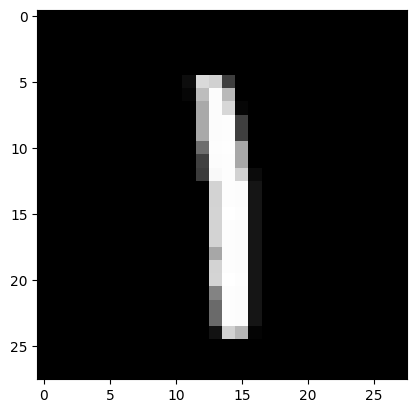

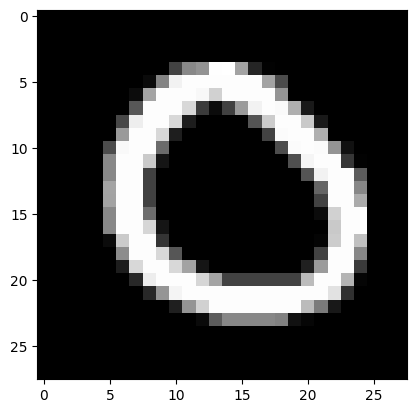

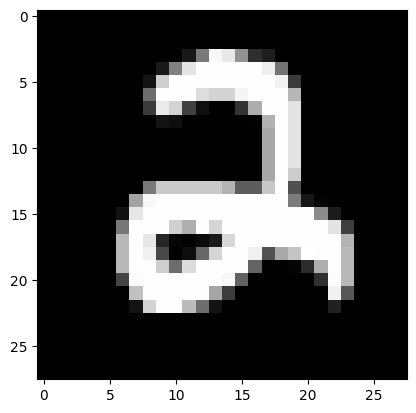

In [ ]:
######################################################################
# main
######################################################################

# def main():

# fix random seed
np.random.seed(0)
torch.manual_seed(0)

# load data with correct file path

data_directory_path =  "/content/drive/My Drive/M146/HW3"


# X.shape = (n_examples, n_features)
# y.shape = (n_examples, )
X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

### three training images with different labels
plot_img(X_train[0]) #label 1
plot_img(X_train[1]) #label 0
plot_img(X_train[7]) #label 2



print("Data preparation...")
print(X_train.shape, X_test.shape)

### convert numpy arrays to tensors
X_train=torch.from_numpy(X_train)
y_train=torch.from_numpy(y_train)

X_valid=torch.from_numpy(X_valid)
y_valid=torch.from_numpy(y_valid)

X_test=torch.from_numpy(X_test)
y_test=torch.from_numpy(y_test)


### prepare dataloaders for training, validation, and testing
### we expect to get a batch of pairs (x_n, y_n) from the dataloader
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=10, shuffle=True)
valid_loader = DataLoader(TensorDataset(X_valid, y_valid), batch_size=10)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=10)


### prepare OneLayerNetwork, criterion, and optimizer
model_one=OneLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_one.parameters(), lr=0.0005)


print("Start training OneLayerNetwork...")
results_one = train(model_one, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

### prepare TwoLayerNetwork, criterion, and optimizer
model_two=TwoLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_two.parameters(), lr=0.0005)


print("Start training TwoLayerNetwork...")
results_two = train(model_two, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

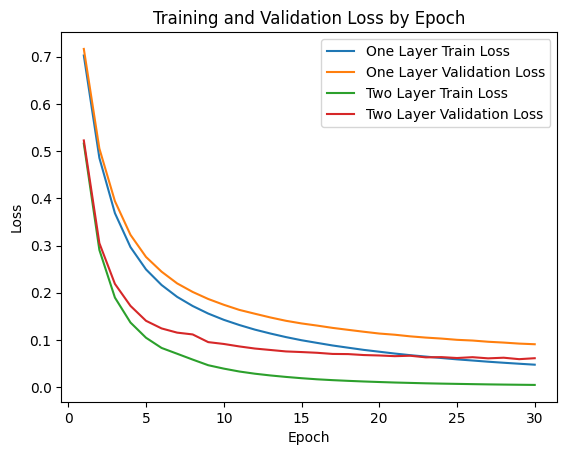

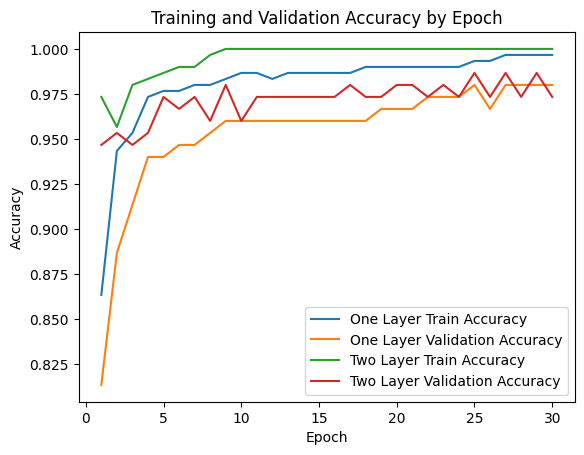

One Layer Test Accuracy: 0.967
Two Layer Test Accuracy: 0.96


In [ ]:

### generate a plot to compare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
epochs=[i for i in range(1,31)]
plt.plot(epochs,one_train_loss, label ="One Layer Train Loss")
plt.plot(epochs,one_valid_loss, label ="One Layer Validation Loss")
plt.plot(epochs,two_train_loss, label ="Two Layer Train Loss")
plt.plot(epochs,two_valid_loss, label ="Two Layer Validation Loss")
plt.title("Training and Validation Loss by Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
plt.plot(epochs,one_train_acc, label ="One Layer Train Accuracy")
plt.plot(epochs,one_valid_acc, label ="One Layer Validation Accuracy")
plt.plot(epochs,two_train_acc, label ="Two Layer Train Accuracy")
plt.plot(epochs,two_valid_acc, label ="Two Layer Validation Accuracy")
plt.title("Training and Validation Accuracy by Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### calculate the test accuracy

print("One Layer Test Accuracy:",round(evaluate_acc(model_one, test_loader).item(),3))
print("Two Layer Test Accuracy:",round(evaluate_acc(model_two, test_loader).item(),3))





